In [42]:
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import joypy

In [118]:
#Load data
# clusters looks like {cluster_id:[123,456,...]} where 123 and 456 are proj ids in that cluster
pickle_in = open("./results/motifs_by_cluster.pickle","rb")
motifs_by_cluster = pickle.load(pickle_in)

pickle_in = open("./results/clusters.pickle","rb")
clusters = pickle.load(pickle_in)

# Load Data
comm_auth_by_proj = pd.read_csv('data/author_commits_by_proj.csv').set_index('p_id')
pr_cr_by_proj = pd.read_csv('data/pr_cr_by_proj.csv').set_index('p_id')
issues_by_proj = pd.read_csv('data/issues_by_proj.csv').set_index('p_id')
owner_age_by_proj = pd.read_csv('data/owner_age_by_proj.csv').set_index('p_id')

project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj,owner_age_by_proj],axis=1)

In [119]:
cluster_lookup = {}
for cluster,value in clusters.items():
    for proj in value:
        cluster_lookup[proj] = cluster

project['cluster'] = project.reset_index().p_id.apply(lambda x: cluster_lookup[x]).values

## tsne Graph

## Summary Stats

In [109]:
project.groupby('cluster').median()

,commits,authors,prs,code_reviews,issues,owner_age
cluster,,,,,,
0,50.0,2.0,0.0,0.0,0.0,1.536986
1,6.0,1.0,0.0,0.0,0.0,1.117808
2,61.5,3.0,0.0,0.0,6.0,1.016438
3,2.0,1.0,0.0,0.0,0.0,0.800000
4,43.5,1.0,0.0,0.0,0.0,1.501370
5,6.0,1.0,0.0,0.0,1.0,0.636986
6,18.0,1.0,0.0,0.0,0.0,1.263014
7,42.0,2.0,0.0,0.0,0.0,1.056164
8,11.0,1.0,0.0,0.0,0.0,1.315068


In [103]:
project.groupby('cluster').quantile(.9)

0.9,commits,authors,prs,code_reviews,issues
cluster,,,,,
0,193.9,4.3,2.0,0.0,12.3
1,10.0,2.0,0.0,0.0,0.0
2,310.0,8.0,21.1,0.0,63.1
3,4.0,2.0,0.0,0.0,0.0
4,283.2,4.0,4.0,0.0,18.0
5,27.8,2.0,2.0,0.0,3.0
6,57.6,2.0,0.0,0.0,0.0
7,161.7,5.0,0.0,0.0,3.0
8,39.0,3.0,1.0,0.0,6.0


In [101]:
project.groupby('cluster').mean()

,commits,authors,prs,code_reviews,issues
cluster,,,,,
0,99.434028,3.413194,1.361111,0.121528,7.253472
1,6.862263,1.265112,0.047496,0.007772,0.237478
2,523.487500,6.975000,25.581250,32.125000,74.900000
3,3.286502,1.160522,0.104499,0.013643,0.289695
4,229.442105,3.436842,2.794737,4.463158,24.273684
5,11.642959,1.537696,0.618777,0.052632,1.718350
6,32.752553,1.571171,0.061862,0.000601,1.704505
7,79.163265,2.589286,0.102041,0.010204,2.548469
8,31.860412,2.000000,0.496568,0.048055,6.398169


## Author by Cluster

In [90]:
project.groupby('cluster').authors.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,288.0,3.413194,11.881797,1.0,1.0,2.0,3.0,177.0
1,2316.0,1.265112,0.582399,1.0,1.0,1.0,1.0,8.0
2,160.0,6.975000,19.127493,1.0,2.0,3.0,5.0,154.0
3,3445.0,1.160522,0.425737,1.0,1.0,1.0,1.0,7.0
4,190.0,3.436842,16.643594,1.0,1.0,1.0,2.0,229.0
5,703.0,1.537696,2.213257,1.0,1.0,1.0,2.0,54.0
6,1665.0,1.571171,2.204919,1.0,1.0,1.0,2.0,52.0
7,392.0,2.589286,3.242491,1.0,1.0,2.0,3.0,43.0
8,437.0,2.000000,2.620491,1.0,1.0,1.0,2.0,36.0


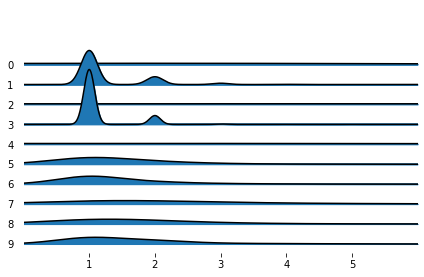

In [81]:
authors_pivot = project.pivot(columns='cluster', values='authors')
_=joypy.joyplot(authors_pivot,x_range=[0,6])

## Commits by Cluster

In [92]:
project.groupby('cluster').commits.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,288.0,99.434028,216.561912,9.0,27.75,50.0,101.00,3224.0
1,2316.0,6.862263,9.160745,3.0,5.00,6.0,8.00,412.0
2,160.0,523.487500,2693.033281,9.0,34.00,61.5,136.25,24461.0
3,3445.0,3.286502,12.192135,2.0,2.00,2.0,3.00,455.0
4,190.0,229.442105,1454.022050,7.0,21.00,43.5,101.75,19730.0
5,703.0,11.642959,17.192284,1.0,3.00,6.0,12.50,219.0
6,1665.0,32.752553,90.190330,8.0,12.00,18.0,31.00,2868.0
7,392.0,79.163265,114.136473,10.0,24.00,42.0,82.00,1007.0
8,437.0,31.860412,101.807974,3.0,8.00,11.0,20.00,1205.0


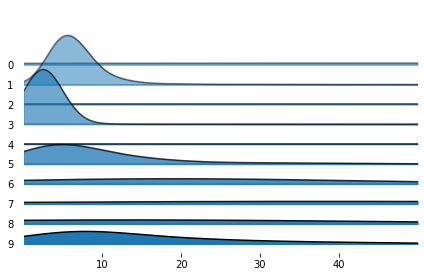

In [87]:
commits_pivot = project.pivot(columns='cluster', values='commits')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,50])

## Issues by Cluster

In [93]:
project.groupby('cluster').issues.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,288.0,7.253472,39.664117,0.0,0.0,0.0,2.00,610.0
1,2316.0,0.237478,2.625789,0.0,0.0,0.0,0.00,101.0
2,160.0,74.900000,497.710042,0.0,0.0,6.0,25.25,5934.0
3,3445.0,0.289695,3.839132,0.0,0.0,0.0,0.00,147.0
4,190.0,24.273684,251.175330,0.0,0.0,0.0,2.00,3457.0
5,703.0,1.718350,5.563187,0.0,0.0,1.0,2.00,115.0
6,1665.0,1.704505,38.985348,0.0,0.0,0.0,0.00,1480.0
7,392.0,2.548469,13.130963,0.0,0.0,0.0,0.00,167.0
8,437.0,6.398169,47.970096,0.0,0.0,0.0,1.00,780.0


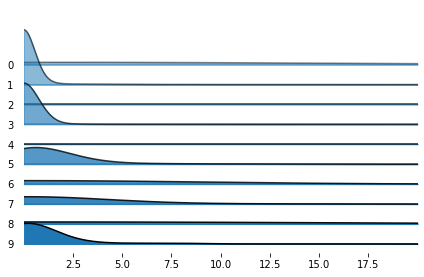

In [76]:
commits_pivot = project.pivot(columns='cluster', values='issues')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,20])

## Pull Requests by Cluster

In [94]:
project.groupby('cluster').prs.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,288.0,1.361111,7.686915,0.0,0.0,0.0,0.00,122.0
1,2316.0,0.047496,1.291737,0.0,0.0,0.0,0.00,61.0
2,160.0,25.581250,218.927071,0.0,0.0,0.0,7.25,2760.0
3,3445.0,0.104499,1.759855,0.0,0.0,0.0,0.00,71.0
4,190.0,2.794737,11.663944,0.0,0.0,0.0,0.00,116.0
5,703.0,0.618777,1.212372,0.0,0.0,0.0,1.00,13.0
6,1665.0,0.061862,1.473856,0.0,0.0,0.0,0.00,58.0
7,392.0,0.102041,0.479552,0.0,0.0,0.0,0.00,6.0
8,437.0,0.496568,1.882589,0.0,0.0,0.0,0.00,15.0


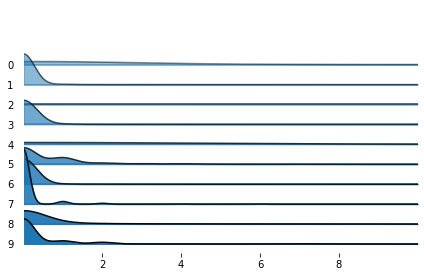

In [78]:
commits_pivot = project.pivot(columns='cluster', values='prs')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,10])

## Code Reviews by Cluster

In [98]:
project.groupby('cluster').code_reviews.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,288.0,0.121528,1.040548,0.0,0.0,0.0,0.0,14.0
1,2316.0,0.007772,0.317836,0.0,0.0,0.0,0.0,15.0
2,160.0,32.125000,372.658607,0.0,0.0,0.0,0.0,4709.0
3,3445.0,0.013643,0.392422,0.0,0.0,0.0,0.0,15.0
4,190.0,4.463158,28.360234,0.0,0.0,0.0,0.0,295.0
5,703.0,0.052632,0.609811,0.0,0.0,0.0,0.0,12.0
6,1665.0,0.000601,0.024507,0.0,0.0,0.0,0.0,1.0
7,392.0,0.010204,0.142674,0.0,0.0,0.0,0.0,2.0
8,437.0,0.048055,0.605765,0.0,0.0,0.0,0.0,9.0


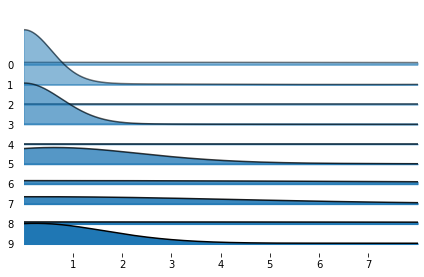

In [80]:
commits_pivot = project.pivot(columns='cluster', values='issues')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,8])

## Owner Age

In [120]:
project.groupby('cluster').owner_age.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,280.0,681.467857,613.901641,0.0,144.00,561.0,1089.75,2764.0
1,2307.0,582.316428,586.107415,0.0,91.00,408.0,883.50,2850.0
2,156.0,550.705128,604.087627,0.0,49.00,371.0,827.50,3042.0
3,3429.0,491.203850,549.872701,0.0,39.00,292.0,757.00,3094.0
4,188.0,676.877660,646.770687,0.0,156.50,548.0,1055.50,2796.0
5,696.0,461.860632,554.019452,0.0,3.75,232.5,767.50,2979.0
6,1657.0,629.005432,597.977679,0.0,121.00,461.0,988.00,2800.0
7,390.0,551.982051,566.710340,0.0,84.25,385.5,859.75,3058.0
8,434.0,606.322581,565.916434,0.0,118.00,480.0,950.25,2434.0


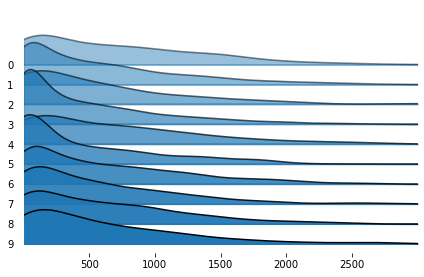

In [123]:
owner_age_pivot = project.pivot(columns='cluster', values='owner_age')
_=joypy.joyplot(owner_age_pivot,fade=True,x_range=[0,3000])